# Load data

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("total_raw_wikidata.csv")
df.head()

,text,label_num,label,title_list
0,"Uddannelse er et udtryk, der både benyttes om ...",0,Uddannelse,Uddannelse
1,30 er en dansk dokumentarfilm fra 2013 instrue...,0,Uddannelse,30 (dokumentarfilm)
2,"Accessit fra latin for han er kommet nær til, ...",0,Uddannelse,Accessit
3,"Almen dannelse er et begreb, der bruges om en ...",0,Uddannelse,Almendannelse
4,"En alumnus eller alumne er altid en person, me...",0,Uddannelse,Alumne


In [21]:
df.shape

(13955, 4)

In [22]:
df[df.title_list == "Behavioralisme"]

,text,label_num,label,title_list
3955,Behavioralisme er en samfundsvidenskabelig ind...,2,Videnskab,Behavioralisme


In [23]:
df.iloc[3955].text

'Behavioralisme er en samfundsvidenskabelig indfaldsvinkel, hvor videnskaben opfattes som adfærdsvidenskab, der på den ene side – i lighed med naturvidenskaben – kan måle og veje samfundsmæssige, empiriske forhold, men på den anden side anerkender, at det videnskabelige objekt ikke kan adskilles fra dets subjekt. Nobelpristageren Gunnar Myrdahl skrev, at data sparker i accept af den videnskabelige værdirelativisme, men som understregning af, at videnskabelig empirisk metode afspejler en virkelighed, som vil give det samme svar til flere forskellige spørgere. Behavioralisme henregnes til positivismen.'

# Check for missing data

In [24]:
df[~df.isnull()]

,text,label_num,label,title_list
0,"Uddannelse er et udtryk, der både benyttes om ...",0,Uddannelse,Uddannelse
1,30 er en dansk dokumentarfilm fra 2013 instrue...,0,Uddannelse,30 (dokumentarfilm)
2,"Accessit fra latin for han er kommet nær til, ...",0,Uddannelse,Accessit
3,"Almen dannelse er et begreb, der bruges om en ...",0,Uddannelse,Almendannelse
4,"En alumnus eller alumne er altid en person, me...",0,Uddannelse,Alumne
...,...,...,...,...
13950,"En selvejende institution er et foretagende, d...",13,Erhvervsliv,Selvejende institution
13951,"En skibsreder er en person, der ejer et eller ...",13,Erhvervsliv,Skibsreder
13952,"En social virksomhed er en virksomhed, der er ...",13,Erhvervsliv,Social virksomhed
13953,En socialøkonomisk virksomhed er en virksomhed...,13,Erhvervsliv,Socialøkonomisk virksomhed


# Konvert data til nyt format

In [25]:
label_names = list(df.label.unique())
label_names

['Uddannelse',
 'Samfund',
 'Videnskab',
 'Natur',
 'Teknologi',
 'Kultur',
 'Historie',
 'Sundhed',
 'Geografi',
 'Økonomi',
 'Sport',
 'Religion',
 'Politik',
 'Erhvervsliv']

In [26]:
id2label = {ix:label for ix, label in enumerate(df.label.unique())}
label2id = {v:k for k, v  in id2label.items()}

In [27]:
dff = pd.get_dummies(df, columns=["label_num"])
dff.drop("label", axis=1, inplace=True)
dff.columns = ["Tekst", "Titel"] + label_names
dff

,Tekst,Titel,Uddannelse,Samfund,Videnskab,Natur,Teknologi,Kultur,Historie,Sundhed,Geografi,Økonomi,Sport,Religion,Politik,Erhvervsliv
0,"Uddannelse er et udtryk, der både benyttes om ...",Uddannelse,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30 er en dansk dokumentarfilm fra 2013 instrue...,30 (dokumentarfilm),1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Accessit fra latin for han er kommet nær til, ...",Accessit,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Almen dannelse er et begreb, der bruges om en ...",Almendannelse,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"En alumnus eller alumne er altid en person, me...",Alumne,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13950,"En selvejende institution er et foretagende, d...",Selvejende institution,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13951,"En skibsreder er en person, der ejer et eller ...",Skibsreder,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13952,"En social virksomhed er en virksomhed, der er ...",Social virksomhed,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13953,En socialøkonomisk virksomhed er en virksomhed...,Socialøkonomisk virksomhed,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Nogle artikeltekster er gengangere. Derfor bør grupperer vi efter teksterne og summerer deres kategorioptællinger

In [28]:
data = dff.groupby(["Tekst", "Titel"]).sum()

In [29]:
data.shape

(10548, 14)

In [30]:

data = data.mask(data>1, 1).reset_index() # sørger for at en tekst kun kan have 0 eller 1 for en kategori - en tekst skal ikke have en værdi af 3 for fx kategorien "Sundhed" bare fordi den er scrapet 3 gange
data

,Tekst,Titel,Uddannelse,Samfund,Videnskab,Natur,Teknologi,Kultur,Historie,Sundhed,Geografi,Økonomi,Sport,Religion,Politik,Erhvervsliv
0,"#Please dont steal my work, er en dansk kampag...",Please don't steal my work,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,"-dømme, som benyttet i forbindelser som kejser...",-dømme,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,. Kontraspionage er en efterretningsdisciplin ...,Kontraspionage,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1 faset induktionsmotor med driftkondensator. ...,1-faset asynkron motor,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"1,000 Guineas Stakes er et hestevæddeløb i Sto...","1,000 Guineas Stakes",0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10543,Øvelsen Operation Mjølner er en kompleks AWWLF...,Operation Mjølner,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10544,"Øvrighed, også kaldet verdslig øvrighed, beteg...",Øvrighed,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10545,Øystein Bråten er norsk freestyle skiløber. Br...,Øystein Bråten,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10546,šAutomatisk vagtplanlægning er et kombinatoris...,Automatisk vagtplanlægning,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
# Check antal multilabel observationer
data[data.iloc[:,1:].sum(axis=1) > 1]

C:\Users\johse\AppData\Local\Temp\ipykernel_5312\3831922275.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data.iloc[:,1:].sum(axis=1) > 1]


,Tekst,Titel,Uddannelse,Samfund,Videnskab,Natur,Teknologi,Kultur,Historie,Sundhed,Geografi,Økonomi,Sport,Religion,Politik,Erhvervsliv
2,. Kontraspionage er en efterretningsdisciplin ...,Kontraspionage,0,1,0,0,0,0,0,0,0,0,0,0,1,0
38,"68ere, 68erne eller 68-generationen er dem der...",68'erne,0,1,0,0,0,1,0,0,0,0,0,0,0,0
41,"7-trins-skalaen, 12-skalaen eller bare den nye...",7-trins-skalaen,1,0,1,0,0,0,0,0,0,0,0,0,0,0
43,8-timers arbejdsdag var en social bevægelse fo...,8-timers arbejdsdag,0,1,0,0,0,0,0,0,0,1,0,0,0,1
52,A.M. Turing-prisen er en pris som gives én gan...,Turing-prisen,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10522,"Økonomisk historie er en del af historiefaget,...",Økonomisk historie,0,1,1,0,0,0,1,0,0,1,0,0,0,0
10523,"Økonomisk kriminalitet er profitmotiverede, lo...",Økonomisk kriminalitet,0,1,0,0,0,0,0,0,0,1,0,0,0,0
10527,Økonomistyring er et fag-begreb der bliver bru...,Økonomistyring,0,0,1,0,0,0,0,0,0,1,0,0,0,1
10528,"Økonomisystemer referer oftest til software, d...",Økonomisystem,0,0,0,0,0,0,0,0,0,1,0,0,0,1


Så omtrent 17% (1802 / 10548) er multilabel

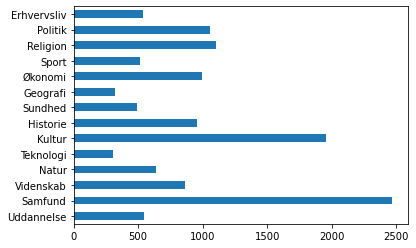

In [32]:
data.iloc[:,2:].sum().plot.barh();

In [33]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.1)
train, val = train_test_split(train, random_state=42, test_size=0.1)

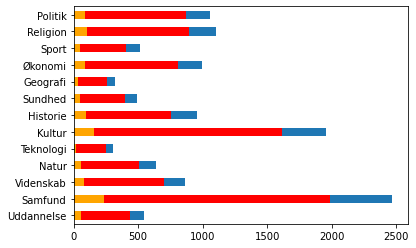

In [34]:
data.iloc[:,2:-1].sum().plot.barh();
train.iloc[:,2:-1].sum().plot.barh(color="red");
val.iloc[:,2:-1].sum().plot.barh(color="orange");

# Gem data

In [35]:
data.to_csv("total_wikidata_processed.csv", index=False)

In [36]:
train.to_csv("train.csv", index=False)
val.to_csv("val.csv", index=False)
test.to_csv("test.csv", index=False)

In [37]:
train.head()

,Tekst,Titel,Uddannelse,Samfund,Videnskab,Natur,Teknologi,Kultur,Historie,Sundhed,Geografi,Økonomi,Sport,Religion,Politik,Erhvervsliv
2152,Det sidste barn er en dansk dokumentarfilm fra...,Det sidste barn,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9415,Struktur indre opbygning –. En struktur angår ...,Struktur,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5806,Hvide eller hvide mennesker er et begreb til a...,Hvide mennesker,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1218,CRC Handbook of Chemistry and Physics er et op...,Gummibibelen,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6256,Islams hellige skrifter er de bøger muslimer t...,Islams hellige skrifter,0,0,0,0,0,0,0,0,0,0,0,1,0,0
